In [21]:
# Refrensi: 
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php
# https://github.com/parulnith/Face-Detection-in-Python-using-OpenCV/blob/master/Face%20Detection%20with%20OpenCV-Python.ipynb
# https://www.datacamp.com/community/tutorials/face-detection-python-opencv#images-and-opencv

# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#  Loading the image to be tested
test_image = cv2.imread('baby1.png')
print("raw data image rgb")
print(test_image)
print(" ")

raw data image rgb
[[[110 109 110]
  [161 156 157]
  [243 237 238]
  ...
  [231 234 235]
  [ 60  60  60]
  [227 227 227]]

 [[110 109 109]
  [161 157 158]
  [243 237 238]
  ...
  [231 234 235]
  [ 60  60  60]
  [227 227 227]]

 [[110 109 109]
  [162 158 158]
  [244 238 239]
  ...
  [231 234 235]
  [ 60  60  60]
  [227 227 227]]

 ...

 [[143 143 143]
  [ 59  59  59]
  [ 75  75  75]
  ...
  [111 111 111]
  [ 92  92  92]
  [233 233 233]]

 [[255 255 255]
  [135 135 135]
  [153 153 153]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [135 135 135]
  [153 153 153]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
 


In [23]:
# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

raw data image grayscale
[[109 157 238 ... 234  60 227]
 [109 158 238 ... 234  60 227]
 [109 158 239 ... 234  60 227]
 ...
 [143  59  75 ... 111  92 233]
 [255 135 153 ... 255 255 255]
 [255 135 153 ... 255 255 255]]


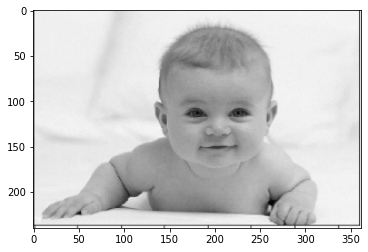

In [24]:
# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')
print("raw data image grayscale")
print(test_image_gray)

In [25]:
# save file raw data ke csv dan npy
np.savetxt('raw_data.csv', test_image_gray, fmt="%d", delimiter=",")
np.savetxt('raw_data.npy', test_image_gray, delimiter=",")
print("File telah disimpan")

File telah disimpan


In [26]:
# fungsi konversi dari grayscale ke RGB lagi
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [27]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
print(haar_cascade_face)

<CascadeClassifier 000001F5AA5727D0>


Faces found:  1
[[[110 109 110]
  [161 156 157]
  [243 237 238]
  ...
  [231 234 235]
  [ 60  60  60]
  [227 227 227]]

 [[110 109 109]
  [161 157 158]
  [243 237 238]
  ...
  [231 234 235]
  [ 60  60  60]
  [227 227 227]]

 [[110 109 109]
  [162 158 158]
  [244 238 239]
  ...
  [231 234 235]
  [ 60  60  60]
  [227 227 227]]

 ...

 [[143 143 143]
  [ 59  59  59]
  [ 75  75  75]
  ...
  [111 111 111]
  [ 92  92  92]
  [233 233 233]]

 [[255 255 255]
  [135 135 135]
  [153 153 153]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [135 135 135]
  [153 153 153]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


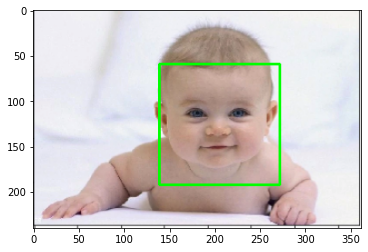

In [28]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))
print(test_image)

In [50]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=1)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 5)
        
    return image_copy

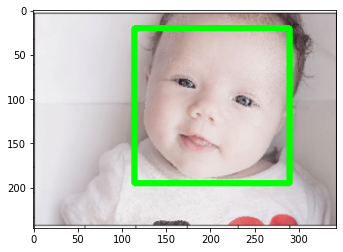

In [51]:
#loading image
test_image2 = cv2.imread('baby2.png')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

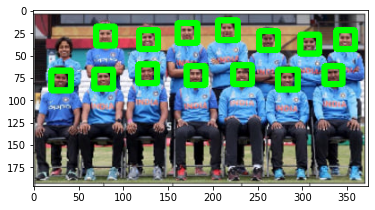

In [52]:
#loading image
test_image2 = cv2.imread('team.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))